In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
healthy_potato_df = os.listdir('/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Potato___healthy')
print(healthy_potato_df[0:5])
print(healthy_potato_df[-5:])

['4a08efaa-28cc-4356-8769-4002f4b299ef___RS_HL 1850.JPG', 'b89db9d3-a413-4781-bc88-5f6c2085ab5f___RS_HL 1909.JPG', '5a3fc4bb-a78c-4276-8934-f0b037ffb860___RS_HL 5412.JPG', '5ea316eb-10a2-42c0-b781-40d90356ccaa___RS_HL 1935.JPG', 'b536ea91-c5f8-413b-87f3-a22ac3d959d1___RS_HL 1825.JPG']
['b9ea902d-e557-4fa5-893b-39a7a57c0121___RS_HL 1893.JPG', '3edf7c3f-73e0-439c-870d-76cfd7c3bc45___RS_HL 1859.JPG', 'dca8ac5c-b925-435a-a5e9-da09fa8938a1___RS_HL 4182.JPG', '7e7b6ab4-9adb-4a3b-abfb-8716b0039879___RS_HL 1921.JPG', '22322780-95b4-4b45-b626-26b22965d55e___RS_HL 1880.JPG']


In [4]:
unhealthy_potatoearlyblight_df = os.listdir('/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Potato___Early_blight')
print(unhealthy_potatoearlyblight_df[0:5])
print(unhealthy_potatoearlyblight_df[-5:])

['03b0d3c1-b5b0-48f4-98aa-f8904670290f___RS_Early.B 7051.JPG', '028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG', '096f6928-24dd-4efd-acc6-b8246318676c___RS_Early.B 8970.JPG', '08a892eb-19cc-45ea-babc-181b98f89238___RS_Early.B 7367.JPG', '042135e2-e126-4900-9212-d42d900b8125___RS_Early.B 8791.JPG']
['ee8df9d4-1893-49a4-b2e9-aee2b1e85ca0___RS_Early.B 6926.JPG', 'f194debe-e829-4bfb-af09-681e50358f50___RS_Early.B 7739.JPG', 'db5d0f5f-a722-4f12-96bf-c9608e5c7f2a___RS_Early.B 8945.JPG', 'f7db505f-aabe-4b96-b719-8c930b5ff471___RS_Early.B 9224.JPG', 'db60c4cf-30f1-460c-a345-3045f192f725___RS_Early.B 6722.JPG']


In [5]:
unhealthy_potatolateblight_df = os.listdir('/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Potato___Late_blight')
print(unhealthy_potatolateblight_df[0:5])
print(unhealthy_potatolateblight_df[-5:])

['0736dad0-be93-484b-9e89-bcb825fefda1___RS_LB 5454.JPG', '0441138d-5f9f-4ede-ab9a-49edabc605b3___RS_LB 4235.JPG', '465165a0-33c0-4593-8324-03513e71079d___RS_LB 4445.JPG', '5759c134-1965-4dd2-b71a-4eef4048f962___RS_LB 3975.JPG', '053c5330-129d-4515-84da-82a701710723___RS_LB 4576.JPG']
['ad2396a9-306e-4ca9-88dc-56b2bde77c6b___RS_LB 2755.JPG', '9157168d-8377-4a75-8dc2-d7c951efeb55___RS_LB 4978.JPG', '80bdc2a3-66b8-4d95-abe7-65c7806f7cbf___RS_LB 3073.JPG', 'c746bac3-3c7a-445c-b78e-19294bd9a9cb___RS_LB 5233.JPG', 'b811c2af-734e-4689-aa43-4ab1d4faec32___RS_LB 4719.JPG']


In [6]:
print('Number of healthy potato images :', len(healthy_potato_df))
print('Number of early blight potato images :', len(unhealthy_potatoearlyblight_df))
print('Number of late blight potato images :', len(unhealthy_potatolateblight_df))

Number of healthy potato images : 152
Number of early blight potato images : 1000
Number of late blight potato images : 1000


In [7]:
#LABEL CREATION

healthy_potato_labels = [1]*152
unhealthy_potatoearlyblight_labels = [0]*1000
unhealthy_potatolateblight_labels = [2]*1000

In [8]:
print(healthy_potato_labels[0:5])
print(unhealthy_potatoearlyblight_labels[0:5])
print(unhealthy_potatolateblight_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2]


In [9]:
print(len(healthy_potato_labels))
print(len(unhealthy_potatolateblight_labels))
print(len(unhealthy_potatoearlyblight_labels))

152
1000
1000


In [10]:
labels = healthy_potato_labels + unhealthy_potatoearlyblight_labels + unhealthy_potatolateblight_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

2152
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]


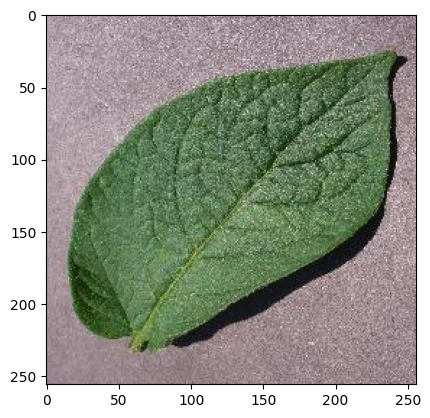

In [11]:
#HEALTHY POTATO

img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Potato___healthy/04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL 1930.JPG')
imgplot = plt.imshow(img)
plt.show()

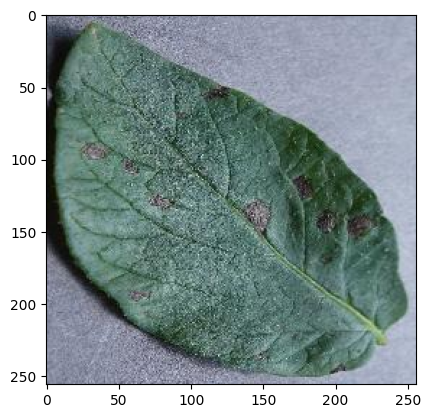

In [12]:
#UNHEALTHY EARLY BLIGHT POTATO

img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG')
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

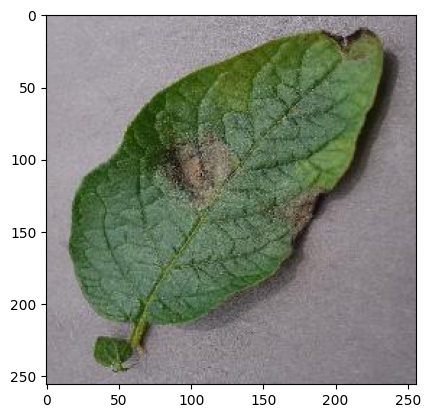

In [13]:
#UNHEALTHY LATE BLIGHT POTATO

img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Potato___Late_blight/006cc01a-1888-4326-9b62-a65cb55a6377___RS_LB 5207.JPG')
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

In [14]:
#RESIZING IMAGES AND CONVERTING TO NUMPY ARRAYS

healthy_potato_path = '/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Potato___healthy/'

data = []

for img_file in healthy_potato_df:
  image = Image.open(healthy_potato_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [15]:
unhealthy_earlyblightpotato_path = '/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Potato___Early_blight/'

for img_file in unhealthy_potatoearlyblight_df:
  image = Image.open(unhealthy_earlyblightpotato_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [16]:
unhealthy_lateblightpotato_path = '/content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Potato___Late_blight/'

for img_file in unhealthy_potatolateblight_df:
  image = Image.open(unhealthy_lateblightpotato_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [17]:
type(data)

list

In [18]:
len(data)

2152

In [19]:
data[0]

array([[[163, 152, 158],
        [175, 164, 170],
        [174, 163, 169],
        ...,
        [189, 174, 181],
        [183, 168, 175],
        [178, 163, 170]],

       [[167, 155, 161],
        [162, 151, 157],
        [177, 165, 172],
        ...,
        [187, 172, 179],
        [170, 155, 162],
        [175, 160, 167]],

       [[170, 157, 164],
        [174, 161, 168],
        [174, 161, 168],
        ...,
        [188, 173, 180],
        [180, 165, 172],
        [177, 162, 169]],

       ...,

       [[152, 131, 138],
        [153, 132, 139],
        [153, 132, 139],
        ...,
        [157, 136, 143],
        [150, 129, 136],
        [161, 140, 147]],

       [[153, 132, 139],
        [158, 137, 144],
        [160, 139, 146],
        ...,
        [163, 142, 149],
        [159, 138, 145],
        [156, 135, 142]],

       [[159, 138, 145],
        [160, 139, 146],
        [162, 141, 148],
        ...,
        [161, 140, 147],
        [159, 138, 145],
        [170, 149, 156]]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
#CONVERTING IMAGE LIST AND LABEL LIST INTO NUMPY ARRAY

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(2152, 128, 128, 3)
(2152,)


In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=10)

In [26]:
print(X.shape, xtrain.shape, xtest.shape)

(2152, 128, 128, 3) (1721, 128, 128, 3) (431, 128, 128, 3)


In [27]:
print(Y.shape, ytrain.shape, ytest.shape)

(2152,) (1721,) (431,)


In [28]:
xtrain_scaled = xtrain/255
xtest_scaled = xtest/255

In [29]:
xtrain[0]

array([[[125, 114, 118],
        [116, 105, 109],
        [127, 116, 120],
        ...,
        [154, 143, 147],
        [157, 146, 150],
        [159, 148, 152]],

       [[134, 123, 127],
        [149, 138, 142],
        [120, 109, 113],
        ...,
        [152, 141, 145],
        [157, 146, 150],
        [157, 146, 150]],

       [[133, 122, 126],
        [119, 108, 112],
        [118, 107, 111],
        ...,
        [152, 141, 145],
        [155, 144, 148],
        [156, 145, 149]],

       ...,

       [[139, 133, 137],
        [131, 125, 129],
        [132, 126, 130],
        ...,
        [176, 170, 174],
        [174, 168, 172],
        [171, 165, 169]],

       [[130, 124, 128],
        [133, 127, 131],
        [131, 125, 129],
        ...,
        [176, 170, 174],
        [182, 176, 180],
        [172, 166, 170]],

       [[130, 124, 128],
        [130, 124, 128],
        [131, 125, 129],
        ...,
        [184, 178, 182],
        [180, 174, 178],
        [177, 171, 175]]

In [30]:
xtrain_scaled[0]

array([[[0.49019608, 0.44705882, 0.4627451 ],
        [0.45490196, 0.41176471, 0.42745098],
        [0.49803922, 0.45490196, 0.47058824],
        ...,
        [0.60392157, 0.56078431, 0.57647059],
        [0.61568627, 0.57254902, 0.58823529],
        [0.62352941, 0.58039216, 0.59607843]],

       [[0.5254902 , 0.48235294, 0.49803922],
        [0.58431373, 0.54117647, 0.55686275],
        [0.47058824, 0.42745098, 0.44313725],
        ...,
        [0.59607843, 0.55294118, 0.56862745],
        [0.61568627, 0.57254902, 0.58823529],
        [0.61568627, 0.57254902, 0.58823529]],

       [[0.52156863, 0.47843137, 0.49411765],
        [0.46666667, 0.42352941, 0.43921569],
        [0.4627451 , 0.41960784, 0.43529412],
        ...,
        [0.59607843, 0.55294118, 0.56862745],
        [0.60784314, 0.56470588, 0.58039216],
        [0.61176471, 0.56862745, 0.58431373]],

       ...,

       [[0.54509804, 0.52156863, 0.5372549 ],
        [0.51372549, 0.49019608, 0.50588235],
        [0.51764706, 0

In [31]:
#BUILDING CNN MODEL

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, Activation

num_of_classes = 3

model = Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
training = model.fit(xtrain_scaled, ytrain, validation_split=0.1, epochs=20)

Epoch 1/20
49/49 [==============================] - 29s 567ms/step - loss: 0.9580 - accuracy: 0.4735 - val_loss: 0.9214 - val_accuracy: 0.5087
Epoch 2/20
49/49 [==============================] - 27s 561ms/step - loss: 0.9043 - accuracy: 0.4910 - val_loss: 0.8845 - val_accuracy: 0.7341
Epoch 3/20
49/49 [==============================] - 28s 563ms/step - loss: 0.6750 - accuracy: 0.7255 - val_loss: 0.5082 - val_accuracy: 0.8266
Epoch 4/20
49/49 [==============================] - 27s 561ms/step - loss: 0.4819 - accuracy: 0.8346 - val_loss: 0.3537 - val_accuracy: 0.8671
Epoch 5/20
49/49 [==============================] - 27s 562ms/step - loss: 0.3767 - accuracy: 0.8663 - val_loss: 0.3743 - val_accuracy: 0.8439
Epoch 6/20
49/49 [==============================] - 28s 563ms/step - loss: 0.3758 - accuracy: 0.8689 - val_loss: 0.2935 - val_accuracy: 0.8786
Epoch 7/20
49/49 [==============================] - 28s 569ms/step - loss: 0.2990 - accuracy: 0.8870 - val_loss: 0.2631 - val_accuracy: 0.8786

In [34]:
loss, accuracy = model.evaluate(xtest_scaled, ytest)
print('Test accuracy :', accuracy)
print('Test loss :', loss)

14/14 [==============================] - 2s 132ms/step - loss: 0.0858 - accuracy: 0.9652
Test accuracy : 0.9651972055435181
Test loss : 0.08575529605150223


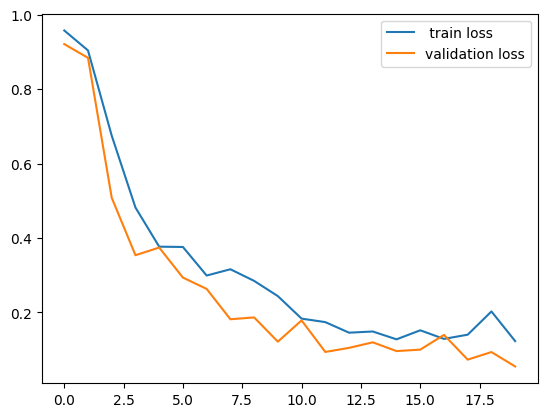

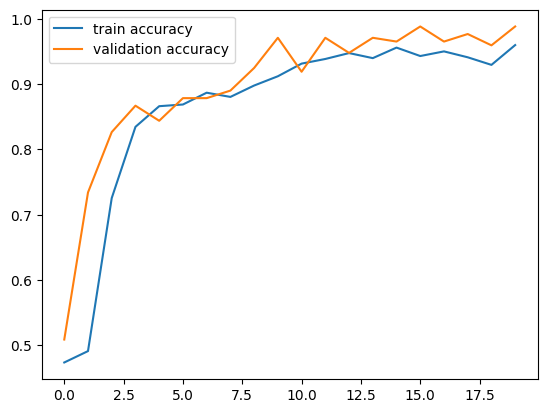

In [35]:
h = training

plt.plot(h.history['loss'], label=' train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Potato___healthy/03da9931-e514-4cc7-b04a-8f474a133ce5___RS_HL 1830.JPG


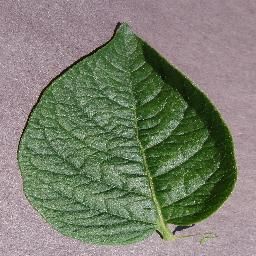

1/1 [==============================] - 0s 95ms/step
[[0.00228224 0.97671956 0.78696716]]
1
The patato in the image is healthy


In [36]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The patato in the image is healthy')

elif input_pred_label == 0:

  print('The potatoin the image is unhealthy(early blight)')

elif input_pred_label == 2:

  print('The patato in the image is unhealthy(late blight)')

Path of the image to be predicted: /content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Potato___Late_blight/00695906-210d-4a9d-822e-986a17384115___RS_LB 4026.JPG


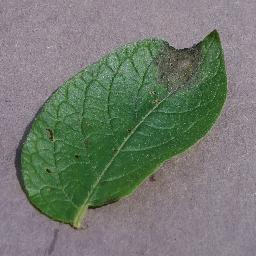

1/1 [==============================] - 0s 21ms/step
[[0.00628973 0.37725    0.91545457]]
2
The patato in the image is unhealthy(late blight)


In [37]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The patato in the image is healthy')

elif input_pred_label == 0:

  print('The potatoin the image is unhealthy(early blight)')

elif input_pred_label == 2:

  print('The patato in the image is unhealthy(late blight)')

Path of the image to be predicted: /content/drive/MyDrive/Colab Notebooks/datasets/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG


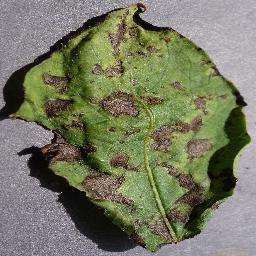

1/1 [==============================] - 0s 32ms/step
[[0.9999641  0.03055958 0.9793324 ]]
0
The potatoin the image is unhealthy(early blight)


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The patato in the image is healthy')

elif input_pred_label == 0:

  print('The potatoin the image is unhealthy(early blight)')

elif input_pred_label == 2:

  print('The patato in the image is unhealthy(late blight)')